In [1]:
from pathlib import Path

from rljax.algorithm import SAC_Discrete
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from classes import Env, Preprocess

PATH = Path().cwd()

In [2]:
raw = Preprocess(PATH.joinpath('asset_data', 'TBT_TBF_data.csv'))
data = raw.process()

In [3]:
def sniper(state_1, state_2, env, start_state):
    state = start_state
    done = False
    all_rewards = list()
    while not done:
        if state[0] == state_1:
            state, reward, done, _ = env.step(0)
        elif state[0] == state_2:
            state, reward, done, _ = env.step(1)
        else:
            state, reward, done, _ = env.step(2)
        all_rewards.append(reward)
    return all_rewards

In [4]:
env = Env(data, no_trade_period=10, steps=2000)
mappings = env.mapping
sniper(mappings['220'], mappings['302'], env, env.reset())
sniper(mappings['220'], mappings['302'], env, env.reset())
env.plot('summarize_state_decisions')

Must include state


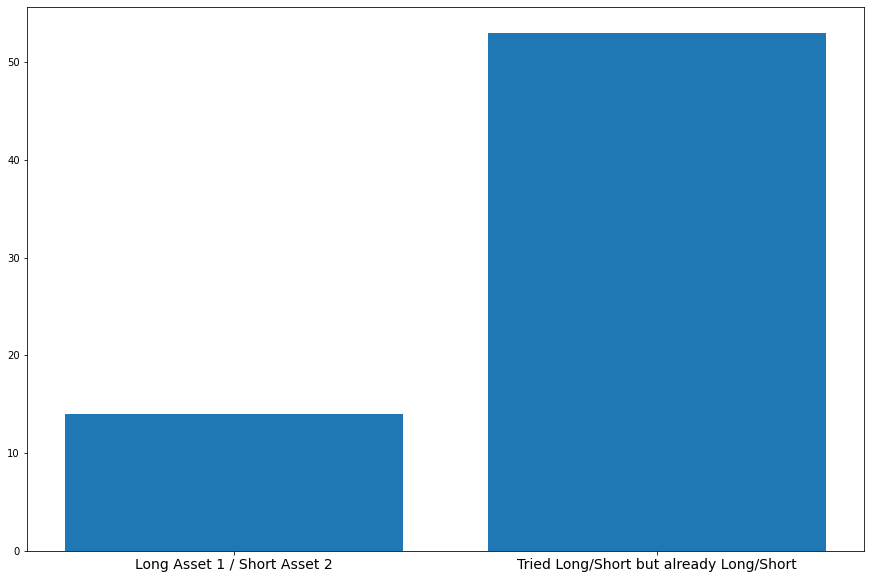

In [5]:
env.plot('summarize_state_decisions', state = '220')

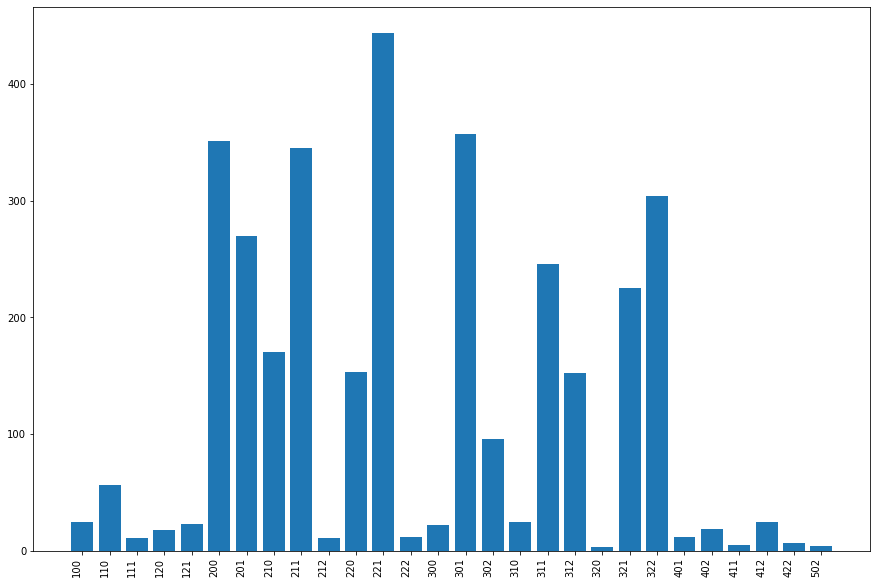

In [6]:
env.plot('state_frequency')

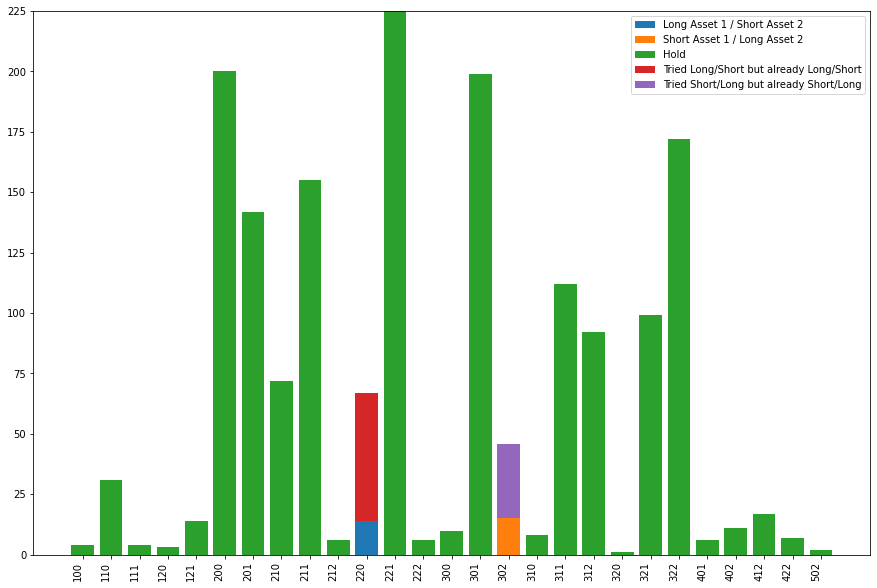

In [7]:
env.plot('summarize_decisions')

In [8]:
def return_rewards(current, last, action, p, c):
    return sum(current) - sum(last)

In [9]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 10000
SEED = 0
DAYS = 1
DAY = 2340

env = Env(data, no_trade_period=5, fixed_buy_cost=0.005, fixed_sell_cost=0.005, steps=DAY*DAYS, reward_func=return_rewards)
env_test = env.copy_env()

algo = SAC_Discrete(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=1000,
    seed=SEED,
)
trainer.train()

Num steps: 1000     Return: -4.1    Time: 0:00:57
Num steps: 2000     Return: 28.5    Time: 0:01:49
Num steps: 3000     Return: 37.7    Time: 0:02:36
Num steps: 4000     Return: 20.9    Time: 0:03:28
Num steps: 5000     Return: 35.3    Time: 0:04:16
Num steps: 6000     Return: 37.4    Time: 0:05:03
Num steps: 7000     Return: 41.5    Time: 0:05:50
Num steps: 8000     Return: 39.1    Time: 0:06:37
Num steps: 9000     Return: 45.0    Time: 0:07:23
Num steps: 10000    Return: 45.3    Time: 0:08:09


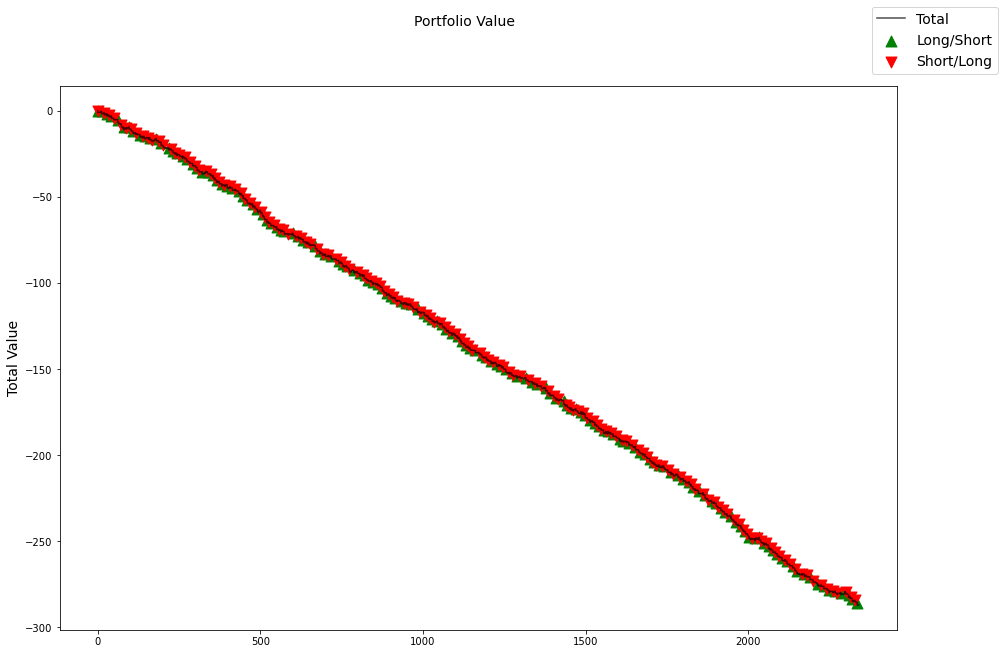

In [10]:
env.plot()

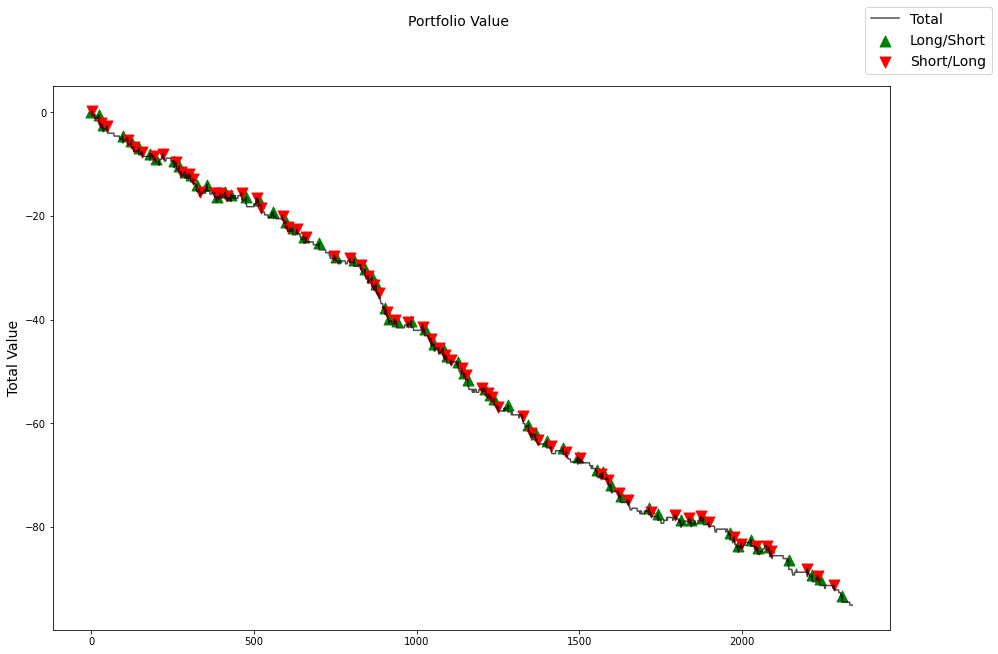

In [11]:
env_test.plot()

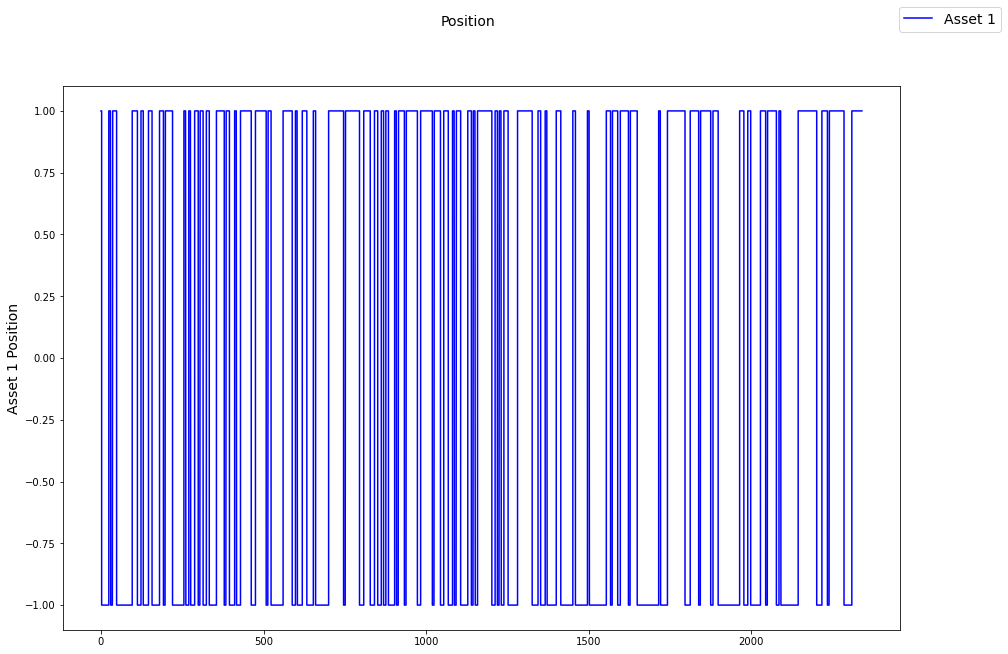

In [12]:
env_test.plot('position_history')

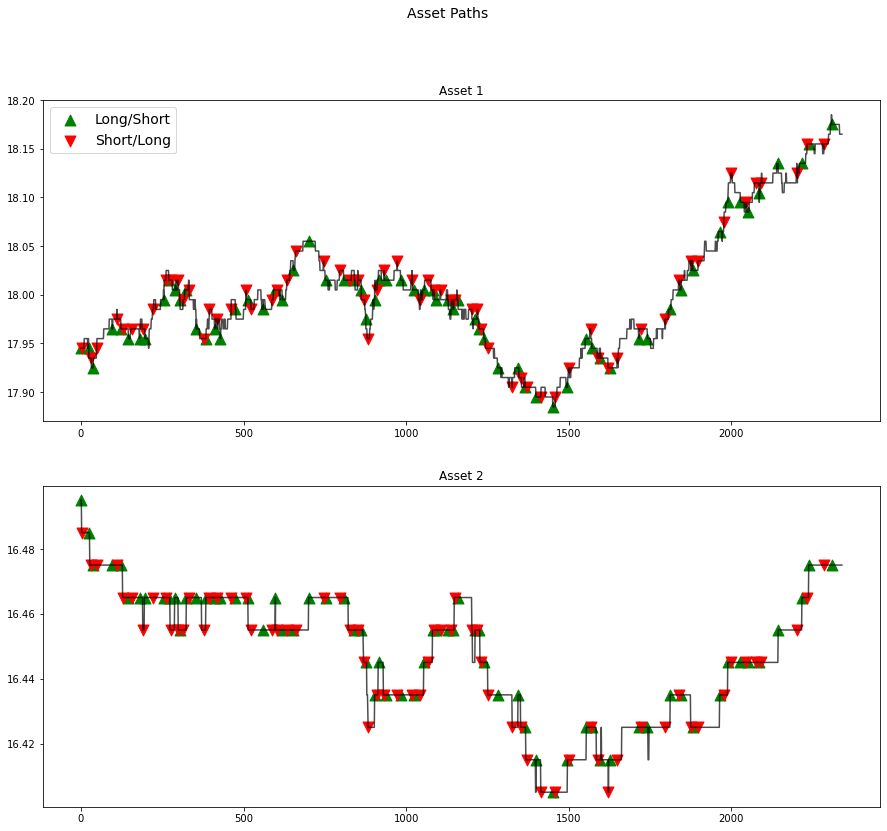

In [13]:
env_test.plot('asset_paths')

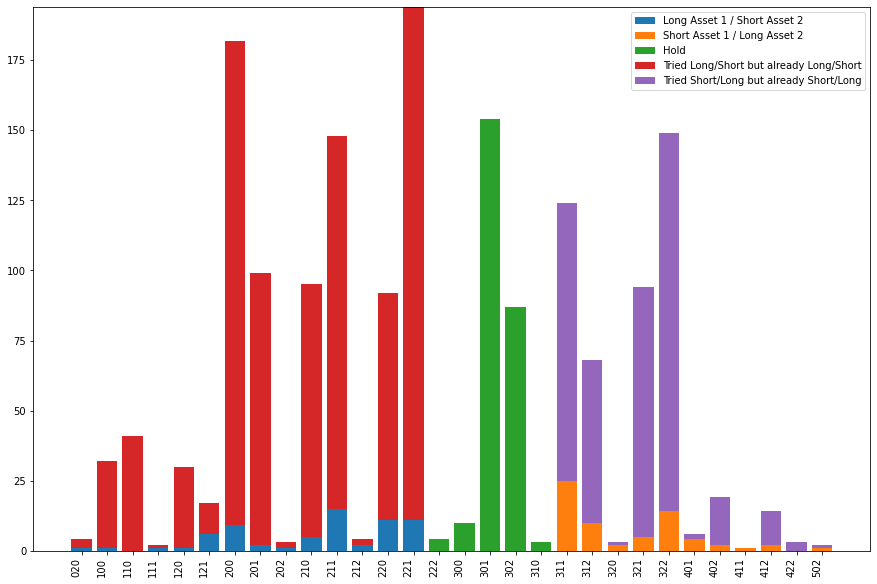

In [14]:
env_test.plot('summarize_decisions')

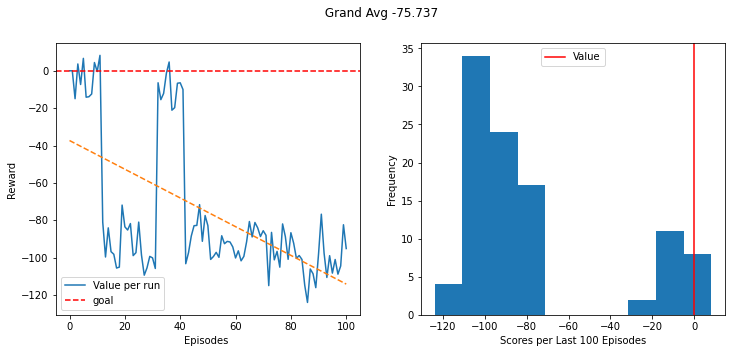

In [15]:
env_test.plot('learning_progress')

In [ ]:
env.portfolio_values

In [ ]:
env.portfolio_history

[0,
 -0.8603804474468006,
 -0.8603804474468006,
 -0.8603804474468006,
 -0.8603804474468006,
 -0.8603804474468006,
 -0.8603804474468006,
 -0.8603804474468006,
 -0.8603804474468006,
 -0.3031221582295984,
 -0.3031221582295984,
 -0.3031221582295984,
 -0.3031221582295984,
 -1.593848184373087,
 -1.593848184373087,
 -1.593848184373087,
 -1.593848184373087,
 -1.593848184373087,
 -1.593848184373087,
 -1.0362791852094233,
 -1.0362791852094233,
 -1.896970342602799,
 -1.896970342602799,
 -2.4542286318198876,
 -1.896970342602799,
 -1.896970342602799,
 -1.896970342602799,
 -1.5938481843729733,
 -1.5938481843729733,
 -2.884327028170219,
 -2.884327028170219,
 -2.3270687389531304,
 -2.3270687389531304,
 -2.3270687389531304,
 -2.3270687389531304,
 -3.1872655316540204,
 -2.6303176062849616,
 -2.93325610976882,
 -3.4902040351378787,
 -3.4902040351378787,
 -3.4902040351378787,
 -2.93325610976882,
 -2.93325610976882,
 -4.223332762344967,
 -4.223332762344967,
 -4.223332762344967,
 -4.223332762344967,
 -4.223

In [17]:
env.portfolio_history

[[-500, 1000, -500],
 [499.1396195525532, -1000, 500],
 [499.1396195525532, -1000.0, 500.0],
 [499.1396195525532, -1000.0, 500.0],
 [499.1396195525532, -1000.0, 500.0],
 [499.1396195525532, -999.4427417107828, 500.0],
 [499.1396195525532, -999.4427417107828, 500.0],
 [499.1396195525532, -999.4427417107828, 500.0],
 [-501.5938481843731, 1000, -500],
 [-501.5938481843731, 1000.0, -500.0],
 [-501.5938481843731, 1000.5575689991637, -500.0],
 [498.1030296573972, -1000, 500],
 [498.1030296573972, -1000.0, 500.3031221582298],
 [498.1030296573972, -1000.0, 500.3031221582298],
 [-502.8843270281702, 1000, -500],
 [496.812734468346, -1000, 500],
 [496.812734468346, -999.4430520746309, 499.69706149651614],
 [496.812734468346, -999.4430520746309, 499.69706149651614],
 [-504.22333276234497, 1000, -500],
 [-504.22333276234497, 1000.0, -500.0],
 [494.91628679020823, -1000, 500],
 [494.91628679020823, -1000.0, 500.0],
 [494.91628679020823, -1000.0, 500.0],
 [494.91628679020823, -1000.0, 500.0],
 [494.9